<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [1]:
set.seed(15)
n = 100
X = rnorm(n)
epsilon = rnorm(n, mean = 0, sd = 1)

beta_0 = 2
beta_1 = 1.5
beta_2 = -3
beta_3 = 0.5

Y = beta_0 + beta_1*X + beta_2*X^2 + beta_3*X^3 + epsilon

data = data.frame(Y = Y, X = X)
for (i in 2:10) {
  data[[paste0("X", i)]] = X^i
}


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [5]:
library(leaps)

best_subset = regsubsets(Y ~ ., data = data, nvmax = 10)
best_summary = summary(best_subset)
best_summary



Subset selection object
Call: regsubsets.formula(Y ~ ., data = data, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

(Intercept)           X          X2          X3          X6 
 1.56961161  1.53196689 -2.49913369  0.49080549 -0.01730072

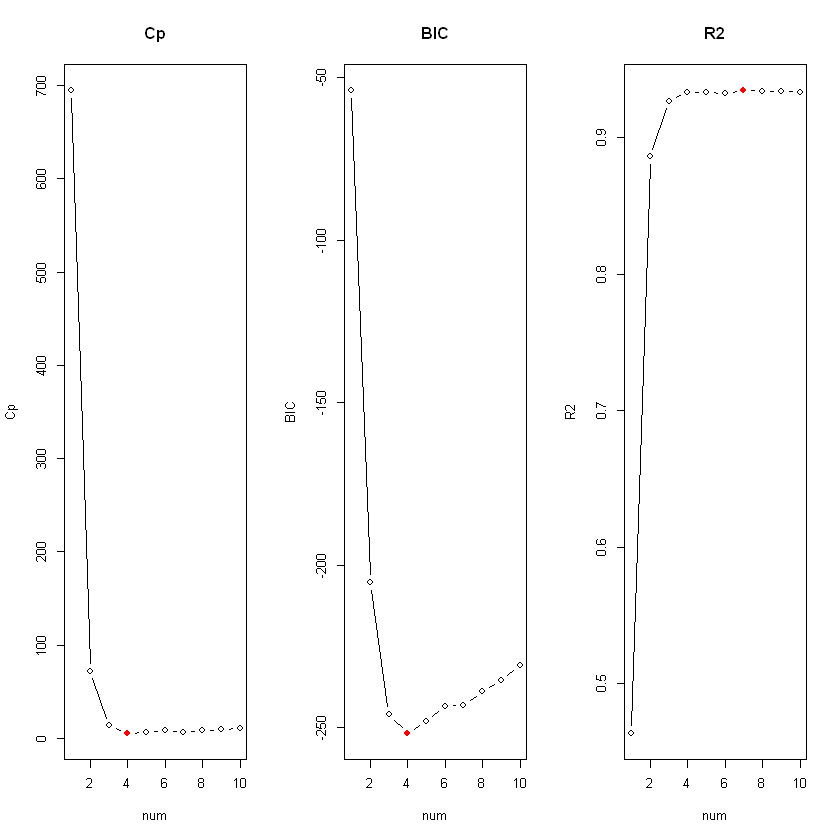

In [14]:
par(mfrow = c(1, 3))

#cp
plot(best_summary$cp, xlab = "num", ylab = "Cp", type = "b", main = "Cp")
best_cp = which.min(best_summary$cp)
points(best_cp, best_summary$cp[best_cp], col = "red", pch = 19)

#BIC
plot(best_summary$bic, xlab = "num", ylab = "BIC", type = "b", main = "BIC")
best_bic = which.min(best_summary$bic)
points(best_bic, best_summary$bic[best_bic], col = "red", pch = 19)

#adj R2
plot(best_summary$adjr2, xlab = "num", ylab = "R2", type = "b", main = "R2")
best_adjr2 = which.max(best_summary$adjr2)
points(best_adjr2, best_summary$adjr2[best_adjr2], col = "red", pch = 19)

coef(best_subset, best_bic) 


> The best model appears to have 4 predictors The coefficients are: intercept = 1.60, X = 1.53, X2 = -2.50, X3 = 0.50, X6 =-0.017
> 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

(Intercept)           X          X2          X3          X6 
 1.56961161  1.53196689 -2.49913369  0.49080549 -0.01730072

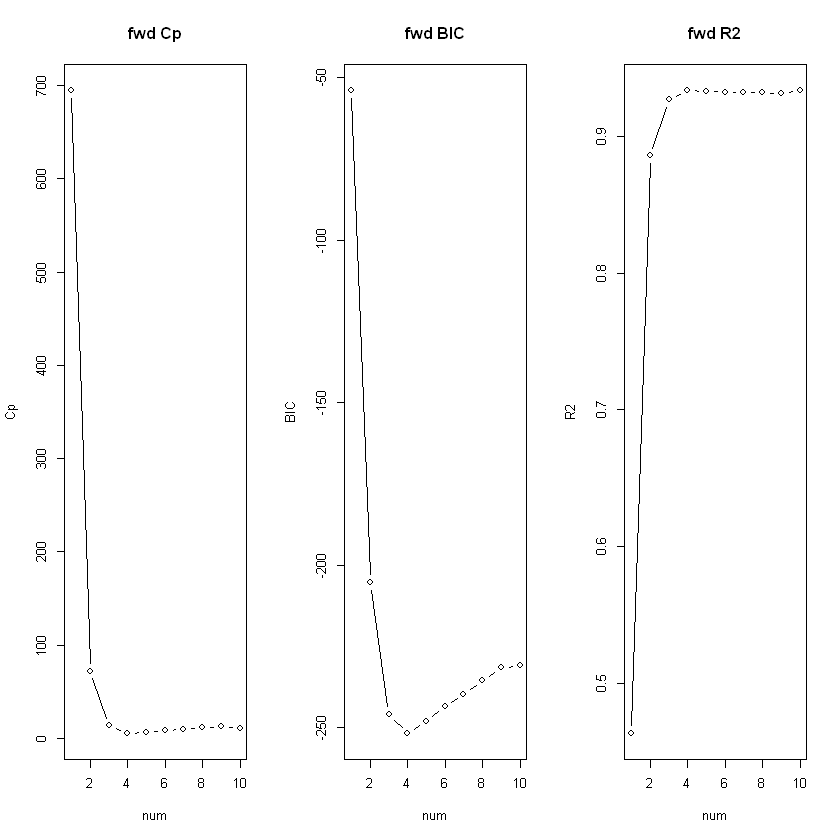

In [17]:
forward_model = regsubsets(Y ~ ., data = data, nvmax = 10, method = "forward")
forward_summary = summary(forward_model)

par(mfrow = c(1, 3))
plot(forward_summary$cp, type = "b", main = "fwd Cp", xlab = "num", ylab = "Cp")
plot(forward_summary$bic, type = "b", main = "fwd BIC", xlab = "num", ylab = "BIC")
plot(forward_summary$adjr2, type = "b", main = "fwd R2", xlab = "num", ylab = "R2")

coef(forward_model, which.min(forward_summary$bic))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

(Intercept)           X          X2          X5          X6          X7 
 1.59814290  1.78224283 -2.54726429  0.22256438 -0.01604063 -0.02528877

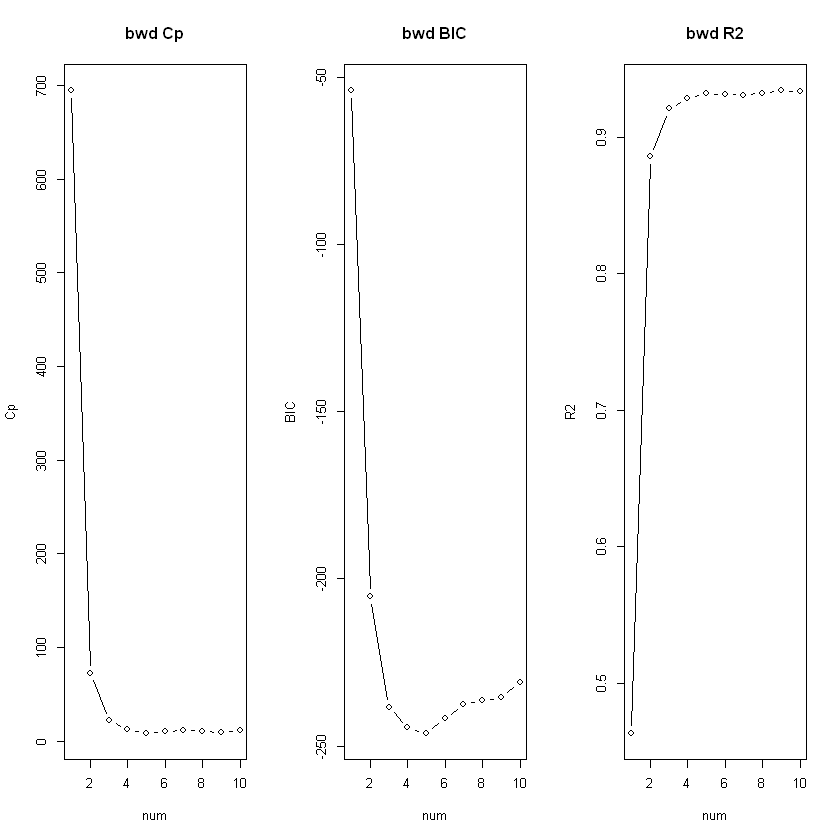

In [18]:
backward_model = regsubsets(Y ~ ., data = data, nvmax = 10, method = "backward")
backward_summary = summary(backward_model)

# Plots
par(mfrow = c(1, 3))
plot(backward_summary$cp, type = "b", main = "bwd Cp", xlab = "num", ylab = "Cp")
plot(backward_summary$bic, type = "b", main = "bwd BIC", xlab = "num", ylab = "BIC")
plot(backward_summary$adjr2, type = "b", main = "bwd R2", xlab = "num", ylab = "R2")

coef(backward_model, which.min(backward_summary$bic))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> Forward stepwise selection seems to have performed best in this instance, as it identifyied all true predictors (X1, X2, X3) with one extra (X6). Backward selection missed X3 and included additional noise predictors (X5 and x7)
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [19]:
set.seed(123)
n = 1000
p = 20

X = matrix(rnorm(n * p), nrow = n, ncol = p)
colnames(X) = paste0("X", 1:p)

beta = c(runif(5, -2, 2), rep(0, p - 5))

epsilon = rnorm(n)
Y = X %*% beta + epsilon

df = data.frame(Y = Y, X)

train_indices = sample(1:n, 100)
test_indices = setdiff(1:n, train_indices)

train = df[train_indices, ]
test = df[test_indices, ]



b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

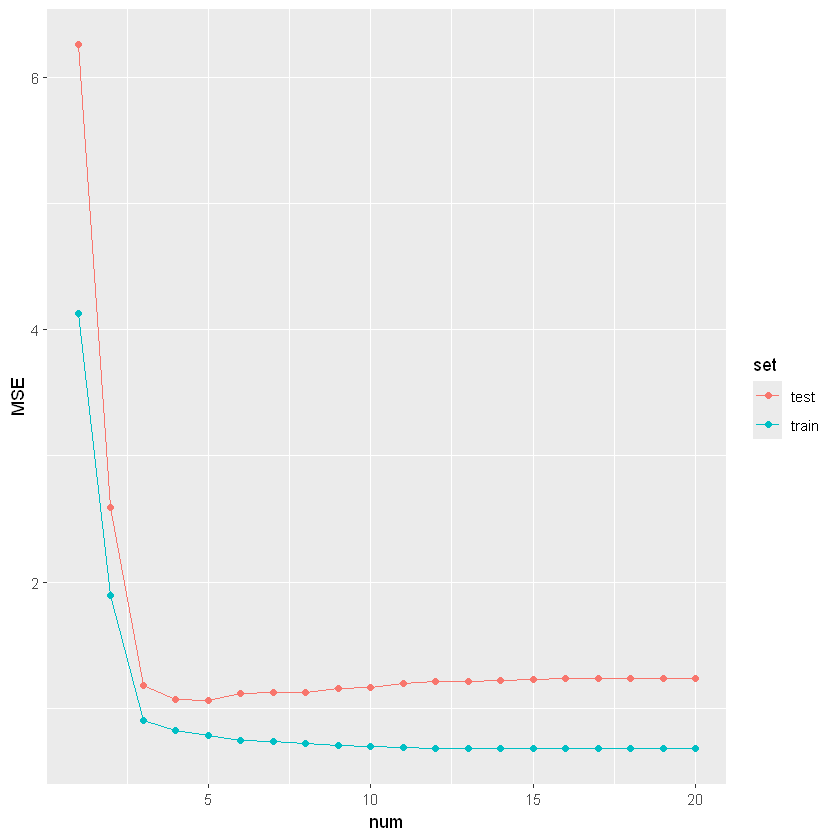

In [32]:
library(ggplot2)
library(tibble)
library(tidyr)

mse_df = tibble(
  num = 1:p,
  train = train_errors,
  test = test_errors
)

mse_long = pivot_longer(mse_df, cols = c("train", "test"),
               names_to = "set",
               values_to = "MSE")

# Plot using ggplot2
ggplot(mse_long, aes(x = num, y = MSE, color = set)) +
  geom_line() +
  geom_point()

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [33]:
best_size = which.min(test_errors)
best_size


[1] 5

> The model with the lowest test MSE had 5 predictors. Even though the true model only used 3 (X1, X2, and X3), this was still the model with the lowest error - the additional variables may be due to random noise.

**DUE:** 5pm EST, April 7, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*